In [22]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [23]:
import matplotlib.pyplot as plt
import numpy as np

In [24]:
N = 100
sigma_noise = 0
x = np.linspace(0, 1, num=N)

np.random.seed(23)
y = 1/(0.1 + x) + sigma_noise*np.random.randn(1, N); y = y.T

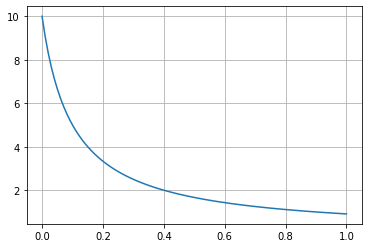

In [25]:
plt.plot(x, y);
plt.grid()

**Functions to implement:**
1. normalize data
2. calculate radial basis functions
3. build regression matrix
4. estimate parameters using weighted least squares

In [184]:
def normalize_data(data):
    mean_values = np.mean(data, axis=0)
    std_values = np.std(data, axis=0)
    data_norm = (data-mean_values)/std_values
    return data_norm, mean_values, std_values

In [185]:
def calculate_radial_basis_function_matrix(x, centers, stds):
    # x: (#samples, #dimensions)
    # centers: (#neurons, #dimensions)
    # stds: (#neurons, #dimensions)
    return np.exp( -0.5*np.square((x - centers) / stds) )

In [186]:
def normalize_rbf(rbf_matrix):
    # rbf_matrix: (#samples, #neurons)
    column_sum = np.sum(rbf_matrix, axis=-1)
    rbf_matrix_norm = np.zeros(rbf_matrix.shape)
    for i in range(rbf_matrix.shape[1]):
        rbf_matrix_norm[:,i] = rbf_matrix[:,i]/column_sum
    return rbf_matrix_norm

In [187]:
def plot_rbf(x, phi):
    for i in range(phi.shape[1]):
        plt.plot(x, phi[:,i]);

In [385]:
def example_process(x, sigma_noise=0):
    y = 5 + x + 2*x**2 - 3*x**3 + sigma_noise*np.random.randn(1, max(x.shape))
    return y

In [189]:
data_norm, mean_values, std_values = normalize_data(np.c_[x, 2*x])

In [190]:
np.std(np.c_[x, 2*x], axis=0)

array([0.29157647, 0.58315293])

In [191]:
np.std(data_norm, axis=0)

array([1., 1.])

In [285]:
N = 100
number_of_neurons = 5
smoothness = 1.5

stds = np.ones(number_of_neurons)*smoothness/10
centers = np.linspace(0, 1, number_of_neurons)
# centers = centers[1:-1]


x = np.array([np.linspace(0, 1, N)])
y = example_process(x, sigma_noise=0.05)
# y = 5 + x + 2*x**2 - 3*x**3 + 0.05*np.random.randn(1, N)
# y = 1/(0.1 + x)

x = x.T
y = y.T

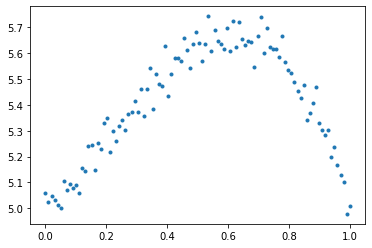

In [286]:
plt.plot(x,y,'.');

In [287]:
x.shape

(100, 1)

In [288]:
phi = calculate_radial_basis_function_matrix(x, centers, stds)

In [289]:
phi_norm = normalize_rbf(phi)

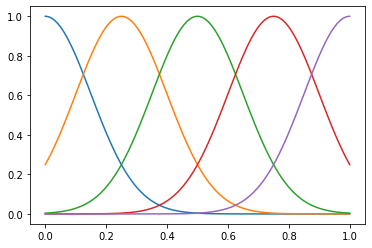

In [290]:
plot_rbf(x, phi)

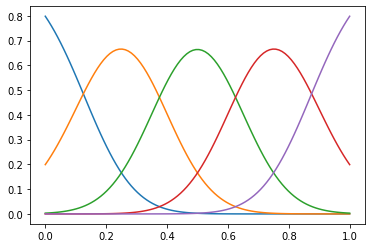

In [291]:
plot_rbf(x, phi_norm)

In [292]:
X = np.c_[np.ones((N, 1)), phi_norm]
# X = phi_norm

# estimate parameters
w_hat = np.linalg.pinv(X)@y

# calculate model output
y_hat = X@w_hat

# NRMSE
np.sqrt(np.mean( (y_hat - y)**2 ))

0.050625443703602155

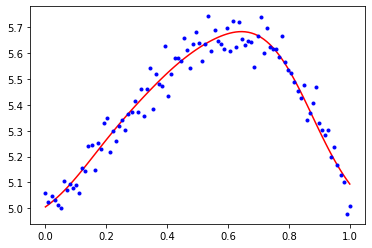

In [293]:
plt.plot(x, y_hat, 'r');
plt.plot(x, y, 'b.');

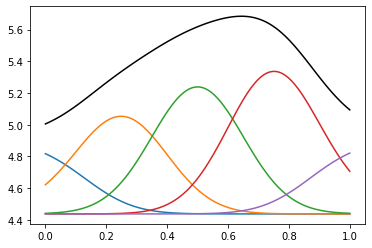

In [295]:
plot_rbf(x, phi_norm*w_hat[1:].T+w_hat[0])
plt.plot(x, y_hat, 'k');

In [296]:
w_hat

array([[4.43776074],
       [0.47568805],
       [0.92490042],
       [1.20634095],
       [1.35019291],
       [0.48063843]])

In [203]:
w_hat.shape

(6, 1)

In [204]:
X.shape

(100, 6)

In [205]:
y.shape

(100, 1)

In [206]:
X.shape

(100, 6)

In [207]:
phi.shape

(100, 5)

In [250]:
def recursive_least_squares(x, y, theta_prev, P_prev, forgetting_factor=1):
    y_hat = x.T @ theta_prev
    error = y - y_hat
    correction = P_prev@x/(x.T@P_prev@x+forgetting_factor)
    theta = theta_prev + correction@error
    P = (np.eye(P_prev.shape[0])-correction@x.T)@P_prev/forgetting_factor
    return theta, P

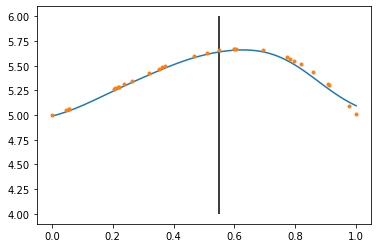

In [400]:
P = np.eye(number_of_neurons+1)
forgetting_factor = 0.9
theta = np.zeros((6,1))
x_sim_plot = np.empty(0)
y_sim_plot = np.empty(0)

import time
from IPython import display

for i in range(30):
    x_sim = np.random.rand(1)
    
    y_sim = example_process(x_sim, sigma_noise=0)

    a = np.append(a, np.random.rand(1))
    x_sim_plot = np.append(x_sim_plot, x_sim)
    y_sim_plot = np.append(y_sim_plot, y_sim)
    
    phi_rls = calculate_radial_basis_function_matrix(x_sim, centers, stds)
    phi_rls_norm = normalize_rbf(np.reshape(phi_rls, (1,number_of_neurons)))
    regressor = np.c_[1, phi_rls_norm]

    theta, P = recursive_least_squares(regressor.T, y_sim, theta, P, forgetting_factor)
    

    plt.cla()
    plt.plot(x, X@theta);
    plt.plot(x_sim_plot, y_sim_plot, '.')
    plt.vlines(x_sim, 4, 6)
        
    display.clear_output(wait=True)
    display.display(plt.gcf())
    time.sleep(0.1)

plt.close()

In [241]:
import matplotlib.pylab as plt
import pandas as pd
import numpy as np

%matplotlib inline

i = pd.date_range('2013-1-1',periods=100,freq='s')

while True:
    try:


    except KeyboardInterrupt:
        break

(6, 6)

In [242]:
np.eye(P.shape[0])

array([[1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.]])

In [ ]:
from IPython.core.debugger import set_trace
set_trace()

In [391]:
a = np.empty(0)
a

array([], dtype=float64)

In [382]:
a = np.append(a, np.random.rand(1))
print(a)

[0.         0.23173208 0.16023606 0.65538236 0.12360676 0.47688358
 0.78445715]
